In [ ]:
import numpy as np
import timeit
import pandas as pd
import scipy
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
import tqdm
import sklearn
from sklearn import datasets
from sklearn import svm

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles


# 1. Dữ liệu

Dữ liệu được sinh từ sklearn.datasets, mỗi tập dữ liệu gồm 100 điểm khác nhau trên mặt phẳng Oxy có nhãn là 0 hoặc 1. Sau khi tìm được tập dữ liệu đúng với ý đồ thì lưu lại để sử dụng lại, và là 4 tập dữ liệu sau đây.

In [ ]:
Y1 = np.array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0])
X1 = np.array([[-0.44617273,-0.39303138],[-1.32274301,1.46366826],[-1.19348011,-0.57465083],[-0.62195966,0.39334987],[-1.03176825,-1.10075618],[-1.64292612,-0.2879722],[-1.02746627,-1.1833588],[-0.12900109,-2.390812],[-1.10130395,-1.19926286],[-1.49542562,-0.81601982],[-0.47680551,-1.75046897],[0.02559479,-1.26135742],[-0.57887342,0.1604178],[-1.18876418,-0.51108389],[-1.05645655,-0.96977793],[-1.83209577,3.10012219],[-0.82289124,0.57089367],[-0.7994999,0.16386302],[-0.91428643,-1.20181021],[-0.69913025,-1.16380183],[-1.57233446,2.17674885],[-0.06771116,-1.04440821],[-0.93305088,1.16858125],[-1.22752782,-0.62246569],[-2.1717461,0.38048867],[-1.18937224,2.02687269],[-0.92074132,-1.10094069],[-1.27027677,-0.43669574],[-1.76862057,2.89391964],[-0.97776715,1.05752607],[-0.96326625,0.87117675],[-0.52078204,-2.02090562],[-0.52251374,-1.72928949],[-0.65183028,0.25758619],[-1.17652185,1.49967224],[-0.88717834,0.60350315],[-0.99977108,-1.20178528],[-0.02728489,-1.22221787],[-1.30186829,1.86846698],[-0.17909089,-1.88262904],[-1.52935349,2.68097874],[-1.87548288,0.13921641],[-0.131122,-0.89760573],[-2.1840251,1.10298344],[-0.53609593,-1.77633152],[-1.12858754,1.19256783],[-1.70471025,2.80925901],[-1.3162409,2.27517352],[-0.87050969,0.72832533],[-0.74322517,-1.5334715],[-0.4219578,-1.86319893],[-1.19936072,1.69333633],[-0.18745719,-1.75209527],[-0.49829884,-2.00123019],[-1.36638721,-0.3239871],[-0.15878116,-2.44711323],[-2.09054586,0.57188541],[-1.06977817,1.12371292],[-1.18378517,-0.49737477],[-0.39851785,-2.11026317],[-1.17102662,-0.89223958],[-1.1119833,-1.11994623],[-0.86333626,0.72909074],[-1.65896476,0.09092081],[-1.18844491,1.87964104],[-1.73549356,2.63000884],[-1.16916917,1.14516784],[-0.81183535,0.24590761],[-0.45384129,-0.50481322],[-0.82300043,-1.46172599],[-1.60702838,2.44282437],[-1.51981951,2.17530241],[-0.80350669,0.39240629],[-1.14768051,1.52795185],[-0.59897764,0.05054826],[-0.68131563,-1.26984054],[-0.37965402,-0.17691621],[-0.63111124,-1.71553313],[-1.37295022,-0.33566444],[-1.39661024,-0.24025497],[-2.31593329,0.82267292],[-1.31396231,1.82672984],[-0.30861293,-2.14746349],[-1.7071841,-0.21798248],[-1.77444928,0.52635116],[-0.52486837,-0.09257151],[-1.08052412,-0.64177525],[-1.12737188,0.87515094],[-0.89246851,-1.23958055],[-1.05434655,0.91640809],[-0.80465152,0.41101797],[-1.43615878,-0.58638489],[-0.93051202,-1.44451521],[-1.25766349,1.3653811],[-0.62977196,0.30947848],[-0.83008759,0.34892274],[-0.92462935,-0.94716623],[-0.72118543,0.54439979],[-1.86610943,2.82160525],[-1.04120787,-0.43823841]])

In [ ]:
X2 = np.array([[-0.849795,0.190104],[1.13305,-0.269955],[1.20369,-0.44406],[-1.20171,-1.94773],[0.689668,-0.00671456],[-0.646643,-0.323757],[-1.08344,1.54548],[-1.00559,0.376307],[-0.848649,0.154608],[1.02225,-0.373434],[0.591054,-1.02204],[1.85727,1.0713],[1.05414,1.26761],[-0.86352,-1.08445],[1.70937,1.34059],[0.445118,-0.727424],[-0.763829,-0.0201871],[-1.34254,0.335329],[-0.437708,0.0793178],[0.727081,0.0895078],[0.630438,-0.168218],[1.38439,0.101744],[1.33748,-0.0426691],[-0.965568,-1.9251],[-0.776532,2.00868],[-1.50333,-0.523298],[-0.98856,-0.208903],[1.73505,-0.137909],[-0.677296,-3.04557],[1.38887,0.904749],[0.198879,-0.121025],[1.3331,-0.513887],[-0.73742,1.59321],[-1.37418,-3.2631],[-0.944433,-0.768742],[-0.569147,1.02325],[0.727894,-0.804975],[-0.588151,0.152815],[1.24209,-1.8673],[-0.761509,-0.341204],[1.67369,-0.670801],[1.1159,-0.892831],[-1.29177,0.465524],[-1.50261,0.706419],[-1.48129,1.40416],[1.53963,1.09291],[1.6905,1.1145],[-1.15961,1.45885],[-1.08257,1.06167],[-1.19108,0.232178],[1.06899,-0.394589],[0.373511,0.541441],[1.06912,1.87058],[1.23555,1.1369],[-0.895589,0.218696],[-0.861465,1.2187],[-1.08545,-0.854284],[0.998532,0.13376],[-0.524431,-0.314044],[-1.0089,-0.232225],[1.21357,-0.494696],[-0.736786,-0.115039],[0.810205,1.10749],[-0.603524,1.57733],[-0.985103,0.942621],[-0.587605,-1.93992],[-0.769387,0.445088],[-1.08218,1.04628],[0.33516,-1.21104],[1.64631,0.594374],[1.28489,0.000344854],[0.624655,0.26947],[0.104529,0.816144],[1.94661,0.561492],[0.767932,-0.224415],[1.76307,0.795789],[1.22299,0.311908],[1.10716,-0.134378],[1.79652,0.314193],[-1.24433,-0.153614],[-0.793566,0.188494],[-1.34242,0.930381],[-1.28056,0.520517],[-1.28908,1.36557],[1.0114,1.35923],[-0.818922,-1.26075],[-1.04333,1.66045],[-0.678671,0.603982],[0.498395,-1.4078],[1.51221,0.403472],[0.160415,-1.32358],[-0.495973,-0.422626],[0.959162,1.01495],[1.4017,0.146165],[-1.15206,0.648192],[1.8283,-0.40842],[0.873239,0.427406],[-0.350936,-0.524226],[-0.781158,2.00145],[-1.24534,-0.0653985]])
Y2 = np.array([0,1,1,0,1,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0])

In [ ]:
Y3 = np.array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])
X3 = np.array([[0.45327093,1.11637595],[0.03995085,0.52287562],[-0.09187225,-0.80034834],[-0.08614111,-0.59569637],[-0.43601278,1.63068645],[-0.5425251,-0.72274526],[0.64018583,1.19570295],[-0.34227984,-0.41169086],[-0.34947962,-0.64438436],[0.41936681,-1.08977774],[-0.93163738,0.30242691],[0.51939097,-1.38121051],[0.96312489,0.76566196],[-0.89378535,-1.42562734],[-1.67086613,1.65192774],[0.51972332,-0.54569957],[-0.49276053,-0.1135872],[0.97628996,-0.82745045],[0.42158479,0.4251104],[0.19248804,2.00011515],[-0.63322475,0.69885626],[0.44456935,1.74509226],[1.73357321,-1.67497332],[-0.15676668,1.2619144],[-0.61754178,0.94287841],[-0.59436502,-1.43619698],[0.79529156,0.80771496],[1.09489835,-0.47151426],[-0.89591873,-1.00505705],[2.46923519,-2.28660478],[-0.54806376,-0.36438039],[-0.47029794,-1.53949251],[0.12888346,0.44743755],[0.72377455,0.88648515],[0.07380595,0.06578941],[-0.85919345,-1.50424126],[-1.46916149,-0.31199104],[-0.96892173,0.88921768],[-1.67747607,-0.41920362],[-0.20901839,1.019882],[-0.17176049,0.45858594],[2.19256541,-0.59711261],[0.82275344,1.05731438],[0.55814093,0.2492743],[-0.53396668,0.8772994],[-0.53371871,-1.57733515],[0.33180862,0.07711575],[0.52811515,-1.13997146],[-0.3038784,-1.08222578],[-0.57426848,0.75364701],[-0.85645939,0.51869949],[-0.3561158,0.64866892],[0.64761759,-0.66295722],[1.36287329,-1.19038417],[0.58331701,-1.02722317],[-1.49752634,0.61405299],[-0.69175243,-0.21505704],[-0.19530292,-0.63047531],[0.36231493,1.06591639],[-1.09295454,-0.62681482],[-0.45974183,1.59879706],[-0.21406762,-0.57628814],[0.80999197,1.6631568],[-0.47605941,-1.07550338],[1.02181761,-1.23786078],[-0.05577095,-1.01229302],[0.03476504,1.10889219],[-1.10401734,0.08709377],[-0.53498458,-1.99150792],[-0.83438991,-0.47029639],[0.81544074,1.35057738],[0.68946917,-0.86448687],[0.75550274,-0.87957748],[-0.73156365,1.67247996],[0.76707647,0.72932496],[1.525405,-1.02252454],[-1.04633089,2.03992753],[-0.85017774,2.19344275],[1.18793299,-1.3419377],[0.97357275,-1.44998079],[0.5231165,0.22048851],[-0.44116058,-1.38855092],[0.09430135,1.83149273],[-0.23637627,-0.96131777],[-0.91050956,0.4622478],[0.21823213,-1.64365578],[-1.27726781,-0.38781767],[-0.14655717,-0.09377323],[-0.01524947,-1.50295181],[-0.85458204,1.78937208],[-0.03443923,-1.05155901],[-0.11797696,-0.26448817],[-0.91329185,1.29731938],[0.76118347,0.66396311],[-0.4472675,1.0189439],[0.18663719,-1.49059124],[-1.32921737,0.60981713],[-0.46500529,0.38308942],[0.6793603,-1.24041993],[1.67327583,1.98866505]])

In [ ]:
X4 = np.array([[9.84906419e-01,2.87438556e-01],[4.49887659e-01,2.97031865e-01],[5.82096051e-01,-8.67863347e-01],[-6.52488843e-01,6.84595228e-01],[-3.08402532e-01,-5.02977076e-01],[3.07120517e-01,4.13939529e-01],[-4.90232621e-01,-2.81840871e-02],[-5.50992123e-02,5.04002564e-01],[3.77693970e-01,-3.49188241e-01],[2.88651139e-01,-4.36466509e-01],[-2.49343793e-01,5.09367178e-01],[3.42963584e-01,2.77937378e-01],[-9.62310852e-01,-6.63773934e-02],[9.41146361e-01,-2.26416924e-01],[9.38090804e-01,4.33773155e-01],[-3.43321067e-01,3.53849894e-01],[1.53166435e-01,-5.26840057e-01],[-7.21068723e-01,-6.93696104e-01],[-9.76155708e-01,8.91170937e-02],[-3.87746885e-01,-9.12929803e-01],[-4.17890555e-01,3.05520344e-01],[-4.40083207e-01,2.07240989e-01],[-5.15669590e-02,5.49190734e-01],[-3.05534422e-01,-9.64692289e-01],[2.21679473e-01,-4.48737542e-01],[1.59904480e-01,4.45696517e-01],[1.03508028e-01,5.39145793e-01],[5.32159565e-01,-6.93242223e-02],[-9.93473313e-01,-3.23775199e-01],[-8.32328372e-01,-5.55687284e-01],[1.08195212e+00,-2.04879685e-01],[6.75369327e-01,-7.32789099e-01],[2.47377484e-01,3.92361668e-01],[-4.91761138e-01,8.80699162e-01],[-6.91652906e-01,-8.13998687e-01],[-4.32623745e-01,4.50768705e-01],[3.80580340e-01,-2.81832831e-01],[-4.15732156e-01,-1.17150716e-01],[-1.07322863e-01,-4.81769132e-01],[9.22976995e-01,-5.01616017e-01],[4.02658838e-01,9.42644384e-01],[1.68947311e-01,-9.57849554e-01],[-5.24228925e-01,1.38725920e-01],[1.07423887e+00,1.32211710e-01],[-5.00380771e-01,1.11701786e-02],[6.41449226e-01,-8.50241721e-01],[3.26668972e-01,-4.20941934e-01],[1.15864763e+00,2.40662305e-04],[-8.45453627e-01,6.62188833e-01],[-2.11980253e-01,-4.51198560e-01],[4.72352921e-01,8.32177870e-02],[-9.58763658e-02,4.48689865e-01],[-1.04202637e-01,1.07209670e+00],[-1.17670320e-01,-9.67387592e-01],[4.90554495e-01,7.11899901e-02],[4.84504504e-01,-1.25496492e-01],[-4.10229939e-01,-8.50280351e-02],[2.12671008e-01,-9.05431216e-01],[-5.88247250e-01,-1.71267741e-01],[7.73138433e-01,-5.10326796e-01],[-4.22260905e-01,-3.34640019e-01],[-9.88712185e-01,2.35928430e-01],[-2.65573702e-01,-3.25604879e-01],[-6.08265335e-01,-9.17714811e-01],[-4.97743317e-01,2.04457748e-01],[-1.85401297e-01,4.64548810e-01],[-7.61433234e-01,-5.79699725e-01],[9.04783920e-01,-3.24425252e-01],[-4.25089459e-01,-3.56271408e-01],[1.35461498e-01,-5.12219022e-01],[4.03289626e-02,1.09486135e+00],[5.48856564e-01,-2.19992827e-01],[-8.74893370e-01,5.41876727e-01],[4.17533672e-01,1.61535365e-01],[-9.81222308e-01,2.47127166e-01],[3.47639649e-01,2.95401339e-01],[3.43295038e-01,3.45125087e-01],[3.90325767e-01,-8.77110665e-01],[-6.29379319e-01,7.62550544e-01],[1.11723355e-01,-5.89182331e-01],[5.88029631e-01,8.20134313e-01],[-9.56156755e-02,-5.76921490e-01],[-3.82756312e-02,-5.35498656e-01],[-1.08192133e-03,-9.96382052e-01],[5.42223848e-01,8.39839685e-01],[2.05255761e-01,9.85925862e-01],[3.90664164e-01,-9.60112213e-02],[3.94716774e-01,-1.81181527e-01],[7.49153908e-01,7.38302944e-01],[-4.56185422e-01,-9.11959337e-02],[9.15223632e-01,3.65427827e-01],[-9.75798811e-01,-1.07853603e-01],[-2.05711216e-01,1.04013396e+00],[-2.17566250e-01,4.69501964e-01],[8.01559041e-01,5.30882807e-01],[-2.16916811e-02,-1.04857881e+00],[-4.15157685e-01,8.97893978e-01],[3.74479573e-01,9.43754361e-01],[-3.18401520e-01,9.20854457e-01],[-1.01020944e+00,-3.46108214e-01]])
Y4 = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

# 2. Hình dạng dữ liệu

In [ ]:
t1 = "Dữ liệu là linearly separable"
t2 = "Dữ liệu vẫn linearly separable nhưng có điểm nhiễu"
t3 = "Dữ liệu không linearly separable nhưng gần linearly separable"
t4 = "Dữ liệu hoàn toàn không linearly separable"

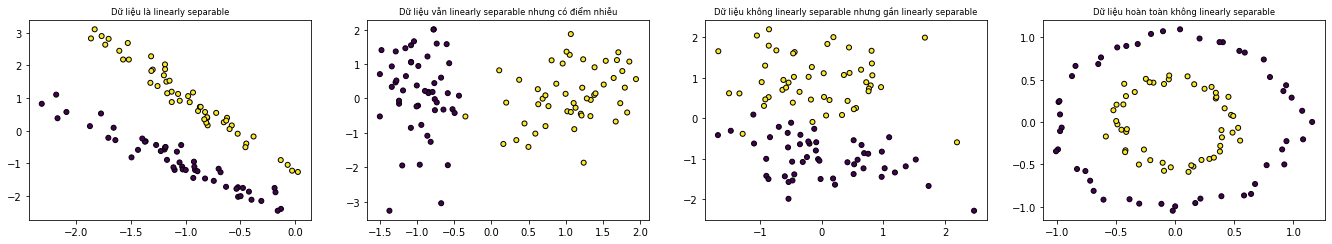

In [ ]:
#Output data
plt.figure(figsize=(20,15))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(441)
plt.title(t1, fontsize='small')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(442)
plt.title(t2, fontsize='small')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')

plt.subplot(443)
plt.title(t3, fontsize='small')
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='k')

plt.subplot(444)
plt.title(t4, fontsize='small')
plt.scatter(X4[:, 0], X4[:, 1], marker='o', c=Y4,
            s=25, edgecolor='k')


# 3. Các hàm cần thiết

## Vẽ đường phân cách và lề của SVM

In [ ]:
def drawsvm(clf,X,y):

  # plot the decision function
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = clf.decision_function(xy).reshape(XX.shape)

  # plot decision boundary and margins
  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
  # plot support vectors
  #ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           #linewidth=1, facecolors='none', edgecolors='k')


## Chạy SVM với kernel = 'linear' trên tập dữ liệu X, tập nhãn y và với C=c

In [ ]:
def run_linear(X,y,c):
  clf = svm.SVC(kernel='linear', C=c)
  clf.fit(X, y)
  drawsvm(clf,X,y)
  return

## Chạy SVM với kernel = 'rbf' trên tập dữ liệu X, tập nhãn y và với C=c, gamma=0.1

In [ ]:
def run_kernel(X,y,c):
  clf = svm.SVC(kernel='rbf', C = c, gamma=0.1)
  clf.fit(X, y)
  drawsvm(clf,X,y)
  return

# 4. Chạy SVM trên 4 tập dữ liệu đã sinh

## Chạy với kernel='linear' C lần lượt là 10^5 và 2

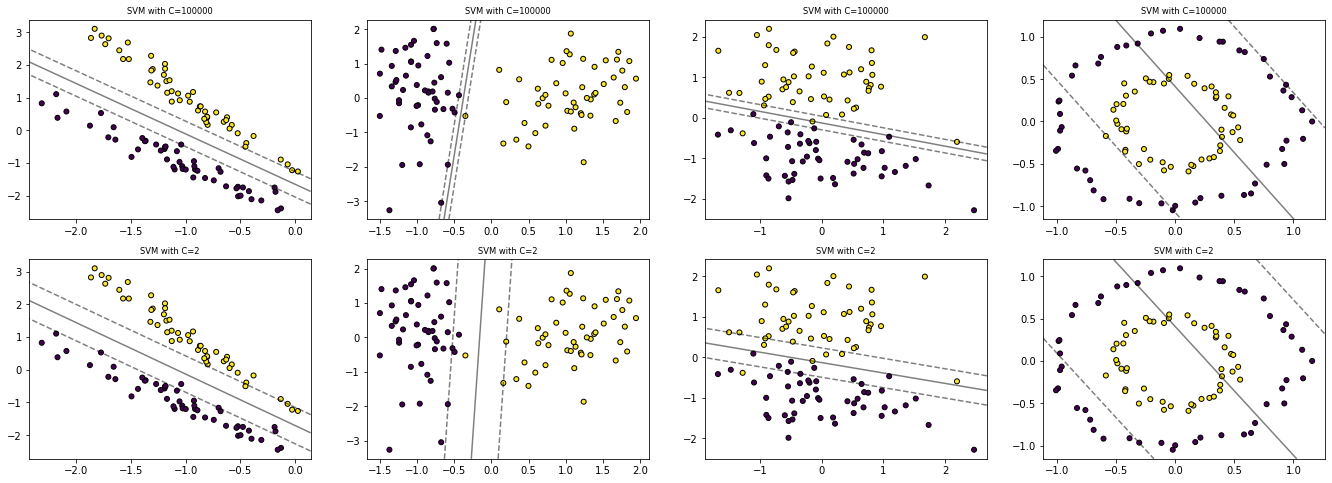

In [ ]:

#SVM with C=100000
plt.figure(figsize=(20 ,15))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
t = "SVM with C=100000"
c = 100000

plt.subplot(441)
plt.title(t, fontsize='small')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
run_linear(X1,Y1,c)

plt.subplot(442)
plt.title(t, fontsize='small')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')
run_linear(X2,Y2,c)

plt.subplot(443)
plt.title(t, fontsize='small')
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='k')
run_linear(X3,Y3,c)

plt.subplot(444)
plt.title(t, fontsize='small')
plt.scatter(X4[:, 0], X4[:, 1], marker='o', c=Y4,
            s=25, edgecolor='k')
run_linear(X4,Y4,c)

#SVM with C=2
t = "SVM with C=2"
c = 2

plt.subplot(445)
plt.title(t, fontsize='small')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
run_linear(X1,Y1,c)

plt.subplot(446)
plt.title(t, fontsize='small')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')
run_linear(X2,Y2,c)

plt.subplot(447)
plt.title(t, fontsize='small')
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='k')
run_linear(X3,Y3,c)

plt.subplot(448)
plt.title(t, fontsize='small')
plt.scatter(X4[:, 0], X4[:, 1], marker='o', c=Y4,
            s=25, edgecolor='k')
run_linear(X4,Y4,c)





*   SVM thông thường chạy trong điều kiện có điểm nhiễu cho về kết quả không tốt bằng SVM soft margin
*   Cả SVM thông thường và SVM soft margin đều chạy không tốt trong điều kiện không linearly separable



## Chạy với kernel='rbf' C lần lượt là 10 và 10^5

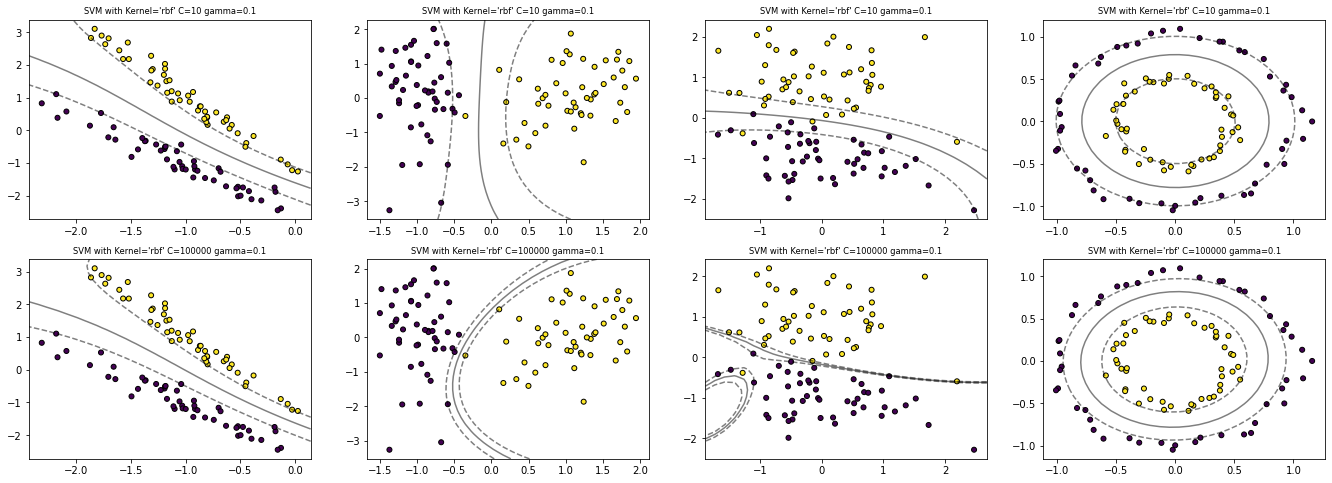

In [ ]:
#SVM with Kernel='rbf' C=10
plt.figure(figsize=(20 ,15))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
t = "SVM with Kernel='rbf' C=10 gamma=0.1"
c = 10

plt.subplot(441)
plt.title(t, fontsize='small')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
run_kernel(X1,Y1,c)

plt.subplot(442)
plt.title(t, fontsize='small')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')
run_kernel(X2,Y2,c)

plt.subplot(443)
plt.title(t, fontsize='small')
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='k')
run_kernel(X3,Y3,c)

plt.subplot(444)
plt.title(t, fontsize='small')
plt.scatter(X4[:, 0], X4[:, 1], marker='o', c=Y4,
            s=25, edgecolor='k')
run_kernel(X4,Y4,c)

#SVM with Kernel='rbf' C=100000
t = "SVM with Kernel='rbf' C=100000 gamma=0.1"
c = 100000

plt.subplot(445)
plt.title(t, fontsize='small')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
run_kernel(X1,Y1,c)

plt.subplot(446)
plt.title(t, fontsize='small')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')
run_kernel(X2,Y2,c)

plt.subplot(447)
plt.title(t, fontsize='small')
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='k')
run_kernel(X3,Y3,c)

plt.subplot(448)
plt.title(t, fontsize='small')
plt.scatter(X4[:, 0], X4[:, 1], marker='o', c=Y4,
            s=25, edgecolor='k')
run_kernel(X4,Y4,c)




*   SVM Kernel chạy tốt trong cả trường hợp linearly separable và không linearly separable
*   Nhưng với C lớn thì SVM Kernel không ra được kết quả tốt trong trường hợp gần linearly separable


# 4. Kết luận

* SVM với kernel đặc biệt (mà trong thử nghiệm này là 'rbf') chạy tốt trên đa số dữ liệu nhưng đòi hỏi các tham số truyền vào phải hợp lí
* SVM linear thì soft margin sẽ tốt hơn hard margin trong đa số trường hợp, đặc biệt là trong trường hợp có điểm dữ liệu bị nhiễu hoặc dữ liệu gần linearly separable và SVM linear sẽ không thể cho kết quả khi dữ liệu không linearly separable
